In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Reload dataset (with no header to prevent misinterpretation)
file_path = "/content/drive/My Drive/blog-gender-dataset.xlsx"
df = pd.read_excel(file_path, header=None)  # Read without using the first row as header

# Rename the first two columns
df = df.iloc[:, :2]  # Keep only the first two columns
df.columns = ["Text", "Gender"]  # Assign correct column names

# Drop rows with missing values
df = df.dropna()

# Display cleaned dataset info and first few rows
print("Cleaned Dataset Info:")
print(df.info())

print("\nFirst 5 Rows of Cleaned Dataset:")
df.head()

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 3226 entries, 0 to 3231
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    3226 non-null   object
 1   Gender  3226 non-null   object
dtypes: object(2)
memory usage: 75.6+ KB
None

First 5 Rows of Cleaned Dataset:


,Text,Gender
0,Long time no see. Like always I was rewriting...,M
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,M
2,Who moved my Cheese??? The world has been de...,M
3,Yesterday I attended a biweekly meeting of an...,M
4,Liam is nothing like Natalie. Natalie never w...,F


In [3]:
# Check for missing values
missing_values = df.isnull().sum()

print("Missing Values in Dataset:")
print(missing_values)

# Print the total number of entries
print(f"Total number of entries in the dataset: {len(df)}")

Missing Values in Dataset:
Text      0
Gender    0
dtype: int64
Total number of entries in the dataset: 3226


In [4]:
print("Unique values in Gender column:")
print(df["Gender"].unique())

Unique values in Gender column:
['M' 'F' ' M' ' F' 'F ' ' M ' 'm' 'f']


In [5]:
# Standardize the Gender column (strip spaces & convert to uppercase)
df["Gender"] = df["Gender"].str.strip().str.upper()

# Check unique values again to confirm the fix
print("Cleaned Unique values in Gender column:")
print(df["Gender"].unique())

Cleaned Unique values in Gender column:
['M' 'F']


<ipython-input-5-4be5f15bcbb8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"] = df["Gender"].str.strip().str.upper()


In [6]:
print("Gender distribution:")
print(df["Gender"].value_counts())

Gender distribution:
Gender
M    1678
F    1548
Name: count, dtype: int64


In [7]:
# Find duplicate rows based on 'Text' column
duplicates = df[df.duplicated(subset=['Text'])]

print(f"Number of duplicate entries: {len(duplicates)}")
print("Sample duplicate entries:")
duplicates.head()

Number of duplicate entries: 11
Sample duplicate entries:


,Text,Gender
1445,Suppose you want to buy a cart horse. Of cour...,F
1446,Two LA Landmarks: Pacific Dining Car and Lang...,F
1556,Man...this car rocks! Push button start...auto...,M
1743,I've found out that my best friend plans to co...,F
1780,Real school starts on Wednesday. I am excited ...,F


In [8]:
# Remove duplicate rows
df = df.drop_duplicates(subset=['Text'], keep='first')

print(f"Number of entries after removing duplicates: {len(df)}")

Number of entries after removing duplicates: 3215


<ipython-input-9-314d955af40c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Gender"], palette="viridis")


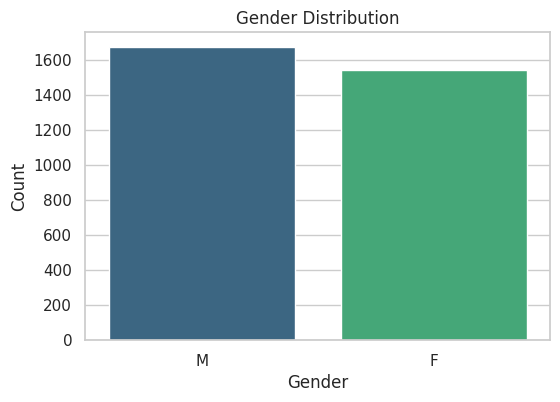

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set Seaborn style
sns.set(style="whitegrid")

# 1️⃣ Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Gender"], palette="viridis")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

#Exploratory Data Analysis (EDA)

In [10]:
df.head()

,Text,Gender
0,Long time no see. Like always I was rewriting...,M
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,M
2,Who moved my Cheese??? The world has been de...,M
3,Yesterday I attended a biweekly meeting of an...,M
4,Liam is nothing like Natalie. Natalie never w...,F


In [11]:
import string
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already done
nltk.download('stopwords')

# Define stop words
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = ''.join([i for i in text if not i.isdigit()])

    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Remove extra spaces
    text = ' '.join(text.split())

    return text

# Apply the clean_text function to the 'Text' column
df['Cleaned_Text'] = df['Text'].apply(clean_text)

# Display the cleaned data
print("Sample cleaned text:")
print(df['Cleaned_Text'].head())

# Display the number of unique cleaned texts
print(f"Number of unique cleaned texts: {df['Cleaned_Text'].nunique()}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Sample cleaned text:
0    long time see like always rewriting scratch co...
1    guest demo eric iverson’s itty bitty search fe...
2    moved cheese world developing areas create dif...
3    yesterday attended biweekly meeting informal u...
4    liam nothing like natalie natalie never went d...
Name: Cleaned_Text, dtype: object
Number of unique cleaned texts: 3209


In [12]:
df.head()

,Text,Gender,Cleaned_Text
0,Long time no see. Like always I was rewriting...,M,long time see like always rewriting scratch co...
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,M,guest demo eric iverson’s itty bitty search fe...
2,Who moved my Cheese??? The world has been de...,M,moved cheese world developing areas create dif...
3,Yesterday I attended a biweekly meeting of an...,M,yesterday attended biweekly meeting informal u...
4,Liam is nothing like Natalie. Natalie never w...,F,liam nothing like natalie natalie never went d...


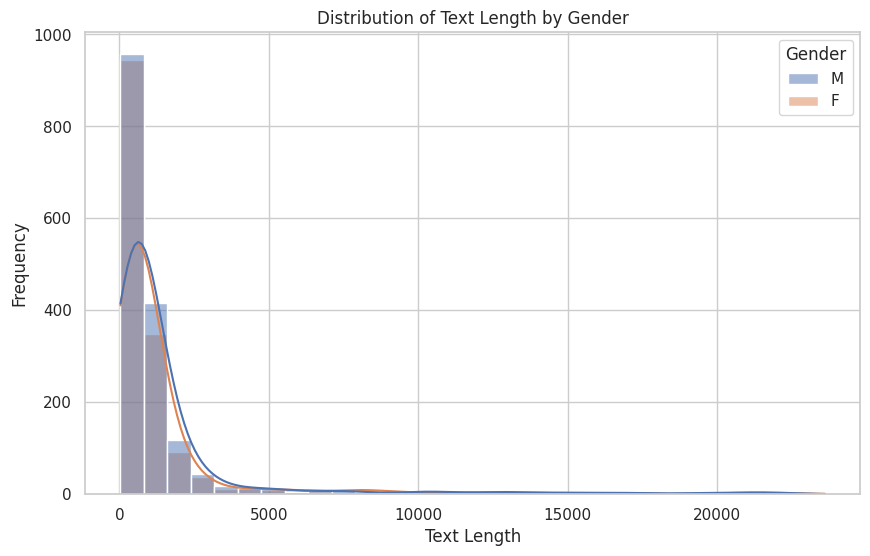

Text Length Statistics by Gender:
         count         mean          std   min    25%    50%      75%      max
Gender                                                                        
F       1542.0  1439.571984  2864.826274  80.0  355.0  657.5  1165.75  23608.0
M       1673.0  1567.668261  3098.780552  38.0  368.0  691.0  1274.00  22962.0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate text length and add as a new column
df['Text_Length'] = df['Cleaned_Text'].apply(len)

# Plotting the distribution of text length by gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Text_Length', hue='Gender', bins=30, kde=True)
plt.title("Distribution of Text Length by Gender")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

# Print basic statistics of text length by gender
print("Text Length Statistics by Gender:")
print(df.groupby("Gender")["Text_Length"].describe())

In [14]:
df.head()

,Text,Gender,Cleaned_Text,Text_Length
0,Long time no see. Like always I was rewriting...,M,long time see like always rewriting scratch co...,652
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,M,guest demo eric iverson’s itty bitty search fe...,1325
2,Who moved my Cheese??? The world has been de...,M,moved cheese world developing areas create dif...,3702
3,Yesterday I attended a biweekly meeting of an...,M,yesterday attended biweekly meeting informal u...,790
4,Liam is nothing like Natalie. Natalie never w...,F,liam nothing like natalie natalie never went d...,638


#Word Frequency Analysis

In [15]:
from collections import Counter

def get_top_words(text_series, top_n=20):
    # Join all cleaned texts into one large string
    all_words = ' '.join(text_series).split()
    # Get the most common words
    word_counts = Counter(all_words)
    return word_counts.most_common(top_n)

# Get top 20 words for each gender
male_top_words = get_top_words(df[df['Gender'] == 'M']['Cleaned_Text'])
female_top_words = get_top_words(df[df['Gender'] == 'F']['Cleaned_Text'])

print("Top 20 Words Used by Males:")
print(male_top_words)

print("\nTop 20 Words Used by Females:")
print(female_top_words)

Top 20 Words Used by Males:
[('one', 2317), ('like', 1966), ('time', 1589), ('would', 1447), ('get', 1331), ('people', 1194), ('new', 1155), ('know', 1062), ('good', 1051), ('also', 1035), ('im', 1034), ('us', 1004), ('first', 994), ('see', 986), ('well', 981), ('even', 955), ('much', 937), ('back', 931), ('think', 929), ('way', 915)]

Top 20 Words Used by Females:
[('one', 2156), ('like', 1981), ('time', 1688), ('im', 1425), ('get', 1398), ('would', 1298), ('know', 1259), ('really', 1122), ('people', 1032), ('new', 1030), ('day', 992), ('think', 976), ('much', 958), ('back', 952), ('good', 938), ('dont', 934), ('even', 933), ('well', 928), ('see', 906), ('love', 897)]


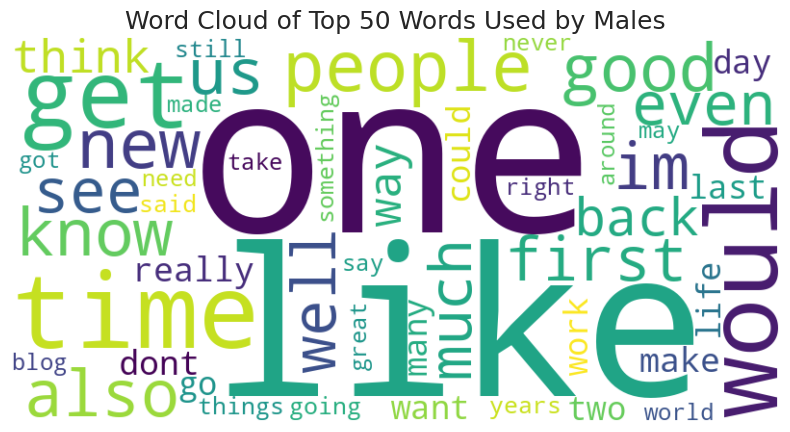

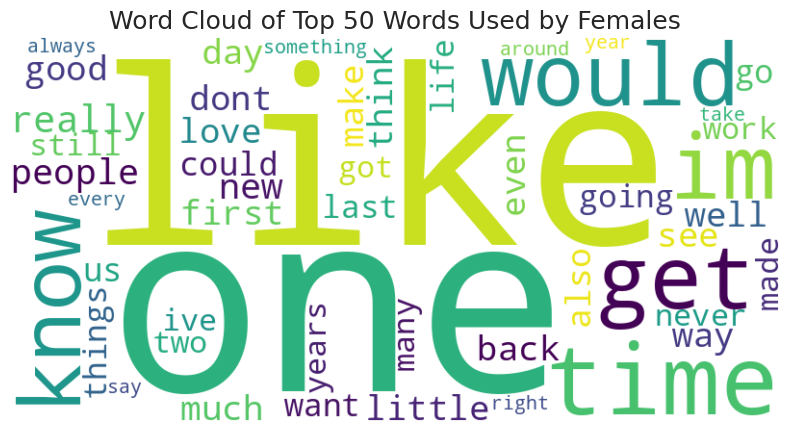

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=18)
    plt.axis('off')
    plt.show()

# Generate word clouds for male and female texts
male_top_words = dict(get_top_words(df[df['Gender'] == 'M']['Cleaned_Text'], top_n=50))
female_top_words = dict(get_top_words(df[df['Gender'] == 'F']['Cleaned_Text'], top_n=50))

# Plot the word clouds
plot_wordcloud(male_top_words, "Word Cloud of Top 50 Words Used by Males")
plot_wordcloud(female_top_words, "Word Cloud of Top 50 Words Used by Females")

#Statistical Comparison of Word Usage

In [17]:
from scipy.stats import chi2_contingency
import pandas as pd

def word_frequency_by_gender(df, gender):
    # Combine all texts of the specified gender
    texts = ' '.join(df[df['Gender'] == gender]['Cleaned_Text']).split()
    # Count word occurrences
    word_counts = pd.Series(texts).value_counts()
    return word_counts

# Get word frequencies for each gender
male_freq = word_frequency_by_gender(df, 'M')
female_freq = word_frequency_by_gender(df, 'F')

# Combine frequencies into a single DataFrame
word_stats = pd.DataFrame({'Male': male_freq, 'Female': female_freq}).fillna(0)

# Perform Chi-Square Test to find significant differences
word_stats['Chi2'], word_stats['p_value'] = zip(*[
    chi2_contingency([[row['Male'], row['Female']],
                      [word_stats['Male'].sum() - row['Male'], word_stats['Female'].sum() - row['Female']]])[:2]
    for _, row in word_stats.iterrows()
])

# Sort by the smallest p-value to find most discriminative words
significant_words = word_stats.sort_values('p_value').head(20)

print("Top 20 Words with Significant Gender Difference:")
print(significant_words[['Male', 'Female', 'Chi2', 'p_value']])

Top 20 Words with Significant Gender Difference:
             Male  Female        Chi2       p_value
game        466.0    86.0  211.567465  6.250219e-48
love        462.0   897.0  206.594600  7.600742e-47
little      531.0   888.0  146.404488  1.059046e-33
im         1034.0  1425.0  128.707413  7.859003e-30
lunch        33.0   178.0  119.835144  6.874253e-28
les           1.0   101.0  110.832221  6.439648e-26
school      277.0   500.0   98.472155  3.296272e-23
sudan         0.0    85.0   95.519407  1.464486e-22
le            6.0    97.0   92.050780  8.448064e-22
husband      37.0   158.0   91.862072  9.293321e-22
darfur        0.0    78.0   87.477285  8.525329e-21
data        171.0    26.0   86.704290  1.260231e-20
wedding       6.0    92.0   86.389638  1.477571e-20
baby         56.0   182.0   84.533600  3.777404e-20
web         225.0    54.0   81.807316  1.500222e-19
film        277.0    81.0   81.362066  1.879308e-19
cute         21.0   110.0   72.287041  1.860652e-17
chocolate    34

In [18]:
df.head()

,Text,Gender,Cleaned_Text,Text_Length
0,Long time no see. Like always I was rewriting...,M,long time see like always rewriting scratch co...,652
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,M,guest demo eric iverson’s itty bitty search fe...,1325
2,Who moved my Cheese??? The world has been de...,M,moved cheese world developing areas create dif...,3702
3,Yesterday I attended a biweekly meeting of an...,M,yesterday attended biweekly meeting informal u...,790
4,Liam is nothing like Natalie. Natalie never w...,F,liam nothing like natalie natalie never went d...,638


#Linguistic Feature Extraction

In [19]:
import nltk
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob

# Download necessary resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

def extract_linguistic_features(text):
    # Tokenize words
    tokens = word_tokenize(text)

    # POS tagging
    pos_tags = pos_tag(tokens)
    pos_counts = nltk.FreqDist(tag for (word, tag) in pos_tags)

    # Sentiment analysis using TextBlob
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity

    # Feature dictionary
    features = {
        'noun_count': pos_counts['NN'] + pos_counts['NNS'],
        'verb_count': pos_counts['VB'] + pos_counts['VBD'] + pos_counts['VBG'] + pos_counts['VBN'] + pos_counts['VBP'] + pos_counts['VBZ'],
        'adj_count': pos_counts['JJ'] + pos_counts['JJR'] + pos_counts['JJS'],
        'adv_count': pos_counts['RB'] + pos_counts['RBR'] + pos_counts['RBS'],
        'sentiment_polarity': sentiment_polarity,
        'sentiment_subjectivity': sentiment_subjectivity,
        'word_count': len(tokens)
    }
    return features

# Apply the feature extraction function to each text
linguistic_features = df['Cleaned_Text'].apply(extract_linguistic_features).apply(pd.Series)

# Concatenate the extracted features with the original DataFrame
df = pd.concat([df, linguistic_features], axis=1)

print("Sample of Extracted Linguistic Features:")
print(df[['Cleaned_Text', 'noun_count', 'verb_count', 'adj_count', 'adv_count', 'sentiment_polarity', 'sentiment_subjectivity', 'word_count']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Sample of Extracted Linguistic Features:
                                        Cleaned_Text  noun_count  verb_count  \
0  long time see like always rewriting scratch co...        31.0        23.0   
1  guest demo eric iverson’s itty bitty search fe...        93.0        42.0   
2  moved cheese world developing areas create dif...       217.0       162.0   
3  yesterday attended biweekly meeting informal u...        47.0        26.0   
4  liam nothing like natalie natalie never went d...        37.0        21.0   

   adj_count  adv_count  sentiment_polarity  sentiment_subjectivity  \
0       17.0       12.0           -0.094872                0.496337   
1       43.0        8.0            0.113756                0.394475   
2      135.0       25.0            0.133776                0.531543   
3       24.0        5.0            0.269762                0.511190   
4       18.0       13.0            0.355208                0.573148   

   word_count  
0        87.0  
1       206.0  
2  

In [20]:
df.head()

,Text,Gender,Cleaned_Text,Text_Length,noun_count,verb_count,adj_count,adv_count,sentiment_polarity,sentiment_subjectivity,word_count
0,Long time no see. Like always I was rewriting...,M,long time see like always rewriting scratch co...,652,31.0,23.0,17.0,12.0,-0.094872,0.496337,87.0
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,M,guest demo eric iverson’s itty bitty search fe...,1325,93.0,42.0,43.0,8.0,0.113756,0.394475,206.0
2,Who moved my Cheese??? The world has been de...,M,moved cheese world developing areas create dif...,3702,217.0,162.0,135.0,25.0,0.133776,0.531543,570.0
3,Yesterday I attended a biweekly meeting of an...,M,yesterday attended biweekly meeting informal u...,790,47.0,26.0,24.0,5.0,0.269762,0.511190,106.0
4,Liam is nothing like Natalie. Natalie never w...,F,liam nothing like natalie natalie never went d...,638,37.0,21.0,18.0,13.0,0.355208,0.573148,100.0


#EDA on Extracted Features

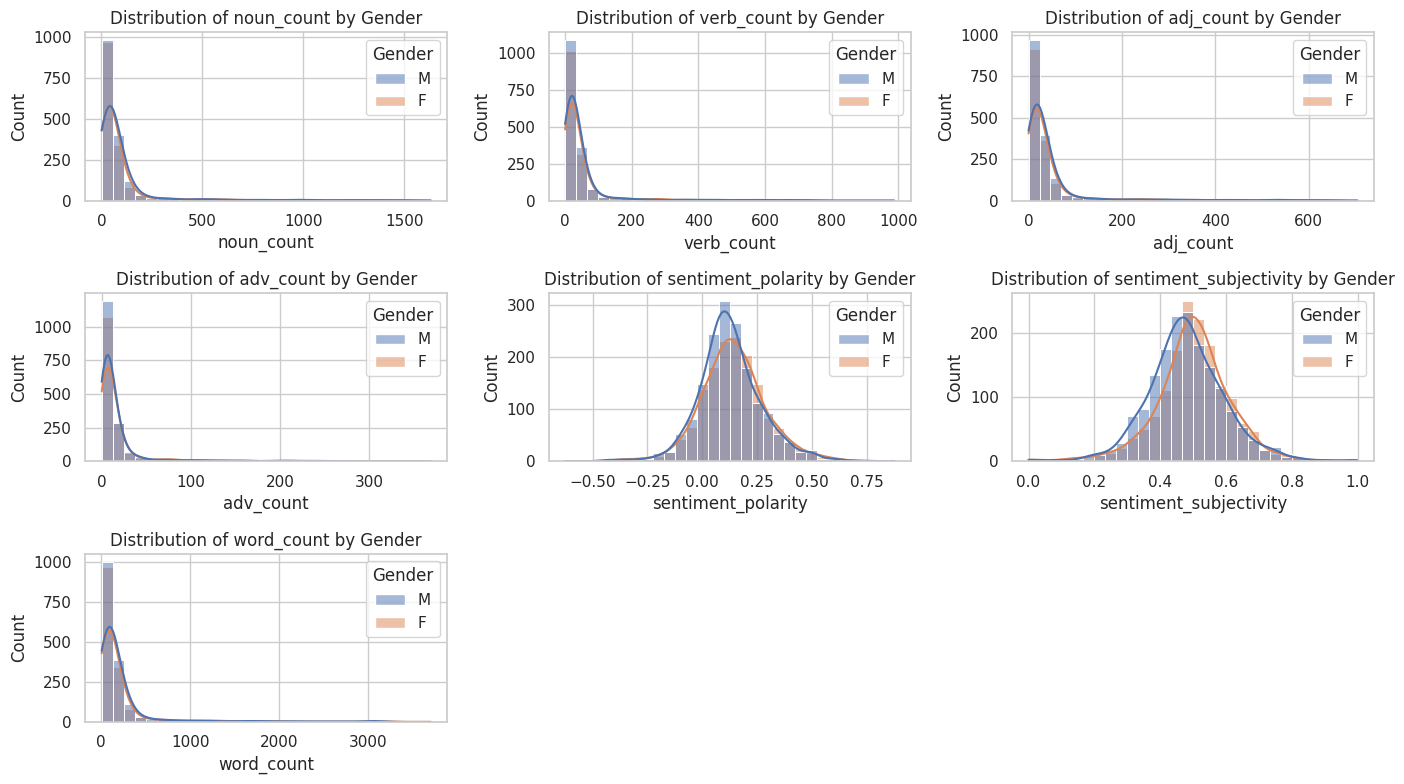

Statistical Summary of Linguistic Features by Gender:
       noun_count                                                         \
            count        mean         std  min   25%   50%   75%     max   
Gender                                                                     
F          1542.0   93.464981  186.942755  5.0  23.0  42.0  76.0  1632.0   
M          1673.0  102.766886  203.318087  1.0  24.0  45.0  83.0  1556.0   

       verb_count             ... sentiment_subjectivity      word_count  \
            count       mean  ...                    75%  max      count   
Gender                        ...                                          
F          1542.0  49.230869  ...               0.563804  1.0     1542.0   
M          1673.0  50.209205  ...               0.549306  1.0     1673.0   

                                                                   
              mean         std   min   25%    50%     75%     max  
Gender                                          

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plotting environment
plt.figure(figsize=(14, 8))

# Plotting the distribution of linguistic features by gender
features = ['noun_count', 'verb_count', 'adj_count', 'adv_count', 'sentiment_polarity', 'sentiment_subjectivity', 'word_count']

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=feature, hue='Gender', kde=True, bins=30)
    plt.title(f'Distribution of {feature} by Gender')

plt.tight_layout()
plt.show()

# Statistical Summary of Linguistic Features by Gender
print("Statistical Summary of Linguistic Features by Gender:")
print(df.groupby("Gender")[features].describe())

#TF-IDF Feature Extraction and Model Training

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Step 1: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(df['Cleaned_Text'])

# Step 2: Prepare Linguistic Features (Numerical)
linguistic_features = df[['noun_count', 'verb_count', 'adj_count', 'adv_count',
                          'sentiment_polarity', 'sentiment_subjectivity', 'word_count']]

# Standardize the numerical features to have similar scaling
scaler = StandardScaler()
linguistic_features_scaled = scaler.fit_transform(linguistic_features)

# Combine TF-IDF features and linguistic features
X_combined = hstack([X_tfidf, linguistic_features_scaled])

# Encode the target variable
y = df['Gender'].map({'M': 0, 'F': 1})

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression Model on Combined Features
log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_combined_log = log_reg.predict(X_test)
print("Logistic Regression with Combined Features:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_combined_log):.4f}")
print(classification_report(y_test, y_pred_combined_log))

# Train SVM Model on Combined Features
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_combined_svm = svm.predict(X_test)
print("\nSVM with Combined Features:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_combined_svm):.4f}")
print(classification_report(y_test, y_pred_combined_svm))

Logistic Regression with Combined Features:
Accuracy: 0.7201
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       335
           1       0.71      0.70      0.71       308

    accuracy                           0.72       643
   macro avg       0.72      0.72      0.72       643
weighted avg       0.72      0.72      0.72       643


SVM with Combined Features:
Accuracy: 0.7154
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       335
           1       0.69      0.72      0.71       308

    accuracy                           0.72       643
   macro avg       0.72      0.72      0.72       643
weighted avg       0.72      0.72      0.72       643



#Combining TF-IDF and POS

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
import nltk

# Step 1: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(df['Cleaned_Text'])

# Step 2: POS Tag Count Vectorization
def pos_tagging(text):
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    pos_counts = nltk.FreqDist(tag for (word, tag) in pos_tags)
    return ' '.join([tag for (tag, count) in pos_counts.items() for _ in range(count)])

# Apply POS tagging on cleaned text
df['POS_Text'] = df['Cleaned_Text'].apply(pos_tagging)

# POS Tag Count Vectorization
pos_vectorizer = CountVectorizer(max_features=1000)  # Limiting to 1000 POS tag combinations
X_pos = pos_vectorizer.fit_transform(df['POS_Text'])

# Combine TF-IDF and POS features
X_combined = hstack([X_tfidf, X_pos])

# Encode the target variable
y = df['Gender'].map({'M': 0, 'F': 1})

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression
log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression with (TF-IDF + POS Tags):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(classification_report(y_test, y_pred_log))

# SVM Model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_svm = svm.predict(X_test)
print("\nSVM with (TF-IDF + POS Tags):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression with (TF-IDF + POS Tags):
Accuracy: 0.6096
              precision    recall  f1-score   support

           0       0.61      0.71      0.65       335
           1       0.61      0.50      0.55       308

    accuracy                           0.61       643
   macro avg       0.61      0.61      0.60       643
weighted avg       0.61      0.61      0.61       643


SVM with (TF-IDF + POS Tags):
Accuracy: 0.6967
              precision    recall  f1-score   support

           0       0.72      0.67      0.70       335
           1       0.67      0.72      0.69       308

    accuracy                           0.70       643
   macro avg       0.70      0.70      0.70       643
weighted avg       0.70      0.70      0.70       643



#POS-Specific TF-IDF

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Step 1: Extract Nouns, Adjectives, and Adverbs from Cleaned Text
def extract_pos_words(text, pos_tags):
    tokens = nltk.word_tokenize(text)
    tagged = nltk.pos_tag(tokens)
    selected_words = [word for word, tag in tagged if tag in pos_tags]
    return ' '.join(selected_words)

# POS Tag Sets
noun_tags = {'NN', 'NNS', 'NNP', 'NNPS'}
adj_tags = {'JJ', 'JJR', 'JJS'}
adv_tags = {'RB', 'RBR', 'RBS'}

# Generate POS-specific text
df['Nouns'] = df['Cleaned_Text'].apply(lambda x: extract_pos_words(x, noun_tags))
df['Adjectives'] = df['Cleaned_Text'].apply(lambda x: extract_pos_words(x, adj_tags))
df['Adverbs'] = df['Cleaned_Text'].apply(lambda x: extract_pos_words(x, adv_tags))

# Display sample output to ensure correctness
print("Sample Nouns:")
print(df['Nouns'].head())
print("\nSample Adjectives:")
print(df['Adjectives'].head())
print("\nSample Adverbs:")
print(df['Adverbs'].head())

Sample Nouns:
0    time couple times uses help path converge btw ...
1    demo iverson ’ s itty search th daniel respond...
2    world areas difference world need change way t...
3    yesterday meeting berkeley group science pysci...
4    nothing cabinets liam bit cabinets hubby secti...
Name: Nouns, dtype: object

Sample Adjectives:
0    long scratch java poor peak fresh standard dif...
1    guest eric bitty february i i demo eric gracio...
2    cheese competitive atleast routine frustrated ...
3    biweekly informal uc python fernando various s...
4    draws good adventurous hardest little least su...
Name: Adjectives, dtype: object

Sample Adverbs:
0    always nevertheless still still easily especia...
1    back still enough yahoo endeca results–especia...
2    rather actually well also nowhere almost final...
3                     elsewhere still away easily also
4    liam never always always together nutrisystem ...
Name: Adverbs, dtype: object


In [25]:
df.head()

,Text,Gender,Cleaned_Text,Text_Length,noun_count,verb_count,adj_count,adv_count,sentiment_polarity,sentiment_subjectivity,word_count,POS_Text,Nouns,Adjectives,Adverbs
0,Long time no see. Like always I was rewriting...,M,long time see like always rewriting scratch co...,652,31.0,23.0,17.0,12.0,-0.094872,0.496337,87.0,JJ JJ JJ JJ JJ JJ JJ JJ JJ JJ JJ JJ JJ JJ JJ J...,time couple times uses help path converge btw ...,long scratch java poor peak fresh standard dif...,always nevertheless still still easily especia...
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,M,guest demo eric iverson’s itty bitty search fe...,1325,93.0,42.0,43.0,8.0,0.113756,0.394475,206.0,JJS NN NN NN NN NN NN NN NN NN NN NN NN NN NN ...,demo iverson ’ s itty search th daniel respond...,guest eric bitty february i i demo eric gracio...,back still enough yahoo endeca results–especia...
2,Who moved my Cheese??? The world has been de...,M,moved cheese world developing areas create dif...,3702,217.0,162.0,135.0,25.0,0.133776,0.531543,570.0,VBN VBN VBN VBN VBN VBN VBN VBN VBN VBN VBN VB...,world areas difference world need change way t...,cheese competitive atleast routine frustrated ...,rather actually well also nowhere almost final...
3,Yesterday I attended a biweekly meeting of an...,M,yesterday attended biweekly meeting informal u...,790,47.0,26.0,24.0,5.0,0.269762,0.511190,106.0,NN NN NN NN NN NN NN NN NN NN NN NN NN NN NN N...,yesterday meeting berkeley group science pysci...,biweekly informal uc python fernando various s...,elsewhere still away easily also
4,Liam is nothing like Natalie. Natalie never w...,F,liam nothing like natalie natalie never went d...,638,37.0,21.0,18.0,13.0,0.355208,0.573148,100.0,RB RB RB RB RB RB RB RB RB RB RB RB NN NN NN N...,nothing cabinets liam bit cabinets hubby secti...,draws good adventurous hardest little least su...,liam never always always together nutrisystem ...


#POS-Specific TF-IDF Vectorization

In [26]:
# TF-IDF Vectorization for Nouns
tfidf_nouns = TfidfVectorizer(max_features=3000, ngram_range=(1, 3))
X_nouns = tfidf_nouns.fit_transform(df['Nouns'])

# TF-IDF Vectorization for Adjectives
tfidf_adjectives = TfidfVectorizer(max_features=2000, ngram_range=(1, 3))
X_adjectives = tfidf_adjectives.fit_transform(df['Adjectives'])

# TF-IDF Vectorization for Adverbs
tfidf_adverbs = TfidfVectorizer(max_features=1000, ngram_range=(1, 3))
X_adverbs = tfidf_adverbs.fit_transform(df['Adverbs'])

# Print shape of each feature set to ensure correctness
print("Shape of Noun TF-IDF Matrix:", X_nouns.shape)
print("Shape of Adjective TF-IDF Matrix:", X_adjectives.shape)
print("Shape of Adverb TF-IDF Matrix:", X_adverbs.shape)

Shape of Noun TF-IDF Matrix: (3215, 3000)
Shape of Adjective TF-IDF Matrix: (3215, 2000)
Shape of Adverb TF-IDF Matrix: (3215, 1000)


In [27]:
# N-Gram TF-IDF Vectorization (Unigram, Bigram, Trigram)
tfidf_ngram = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
X_ngram = tfidf_ngram.fit_transform(df['Cleaned_Text'])

# Print shape to verify
print("Shape of N-Gram TF-IDF Matrix:", X_ngram.shape)

Shape of N-Gram TF-IDF Matrix: (3215, 5000)


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# Step 1: Generate POS Tag Sequences
def pos_tag_sequence(text):
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    pos_sequence = ' '.join([tag for word, tag in pos_tags])
    return pos_sequence

# Apply POS tagging to generate sequences
df['POS_Sequence'] = df['Cleaned_Text'].apply(pos_tag_sequence)

# Step 2: Vectorize POS Tag Sequences using CountVectorizer
pos_vectorizer = CountVectorizer(max_features=1000)  # Limiting to 1000 most frequent POS patterns
X_pos_tags = pos_vectorizer.fit_transform(df['POS_Sequence'])

# Print the shape to verify
print("Shape of POS Tag Vectorized Matrix:", X_pos_tags.shape)

Shape of POS Tag Vectorized Matrix: (3215, 33)


In [29]:
from scipy.sparse import hstack
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Step 1: Combine all feature sets
X_combined = hstack([X_nouns, X_adjectives, X_adverbs, X_ngram, X_pos_tags])

# Encode the target variable
y = df['Gender'].map({'M': 0, 'F': 1})

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression
log_reg = LogisticRegression(max_iter=300, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression with Combined Features (TF-IDF + N-Gram + POS):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(classification_report(y_test, y_pred_log))

# SVM Model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_svm = svm.predict(X_test)
print("\nSVM with Combined Features (TF-IDF + N-Gram + POS):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression with Combined Features (TF-IDF + N-Gram + POS):
Accuracy: 0.7061
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       335
           1       0.69      0.69      0.69       308

    accuracy                           0.71       643
   macro avg       0.71      0.71      0.71       643
weighted avg       0.71      0.71      0.71       643


SVM with Combined Features (TF-IDF + N-Gram + POS):
Accuracy: 0.6454
              precision    recall  f1-score   support

           0       0.67      0.64      0.65       335
           1       0.62      0.66      0.64       308

    accuracy                           0.65       643
   macro avg       0.65      0.65      0.65       643
weighted avg       0.65      0.65      0.65       643



In [30]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nltk

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(df['Gender'])

# Function to extract POS tags as text
def pos_tag_sequence(text):
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    pos_sequence = ' '.join([tag for word, tag in pos_tags])
    return pos_sequence

# Generate POS tagged texts
df['POS_Text'] = df['Cleaned_Text'].apply(pos_tag_sequence)

# Vectorizer configurations
vectorizers = {
    'tfidf_unigram': TfidfVectorizer(max_features=5000, ngram_range=(1, 1)),
    'tfidf_bigram': TfidfVectorizer(max_features=5000, ngram_range=(1, 2)),
    'tfidf_trigram': TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
}

# Classifier configurations
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear', random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Prepare results DataFrame
results = []

# Iterate over preprocessing techniques
for preprocessing in ['none', 'pos_tag']:
    # Select text for vectorization
    if preprocessing == 'none':
        text_data = df['Cleaned_Text']
    else:
        text_data = df['POS_Text']

    # Iterate over vectorizers
    for vec_name, vectorizer in vectorizers.items():
        X = vectorizer.fit_transform(text_data)

        # Train-Test Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

        # Iterate over classifiers
        for clf_name, clf in classifiers.items():
            # Train the model
            clf.fit(X_train, y_train)

            # Predictions
            y_pred = clf.predict(X_test)

            # Evaluate the model
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')

            # Append results
            results.append([preprocessing, vec_name, clf_name, accuracy, precision, recall, f1])

# Create a DataFrame for the results
results_df = pd.DataFrame(results, columns=['Preprocessing', 'Vectorizer', 'Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results_df)

   Preprocessing     Vectorizer           Classifier  Accuracy  Precision  \
0           none  tfidf_unigram          Naive Bayes  0.693624   0.697336   
1           none  tfidf_unigram                  SVM  0.701400   0.701400   
2           none  tfidf_unigram  Logistic Regression  0.690513   0.690320   
3           none  tfidf_unigram        Random Forest  0.673406   0.674332   
4           none   tfidf_bigram          Naive Bayes  0.684292   0.686440   
5           none   tfidf_bigram                  SVM  0.704510   0.704321   
6           none   tfidf_bigram  Logistic Regression  0.687403   0.687280   
7           none   tfidf_bigram        Random Forest  0.662519   0.663534   
8           none  tfidf_trigram          Naive Bayes  0.688958   0.690738   
9           none  tfidf_trigram                  SVM  0.702955   0.702856   
10          none  tfidf_trigram  Logistic Regression  0.685848   0.685690   
11          none  tfidf_trigram        Random Forest  0.671851   0.672232   

In [31]:
import pandas as pd

# Assuming the results are stored in a DataFrame called results_df
# Display the DataFrame in a cleaner, side-by-side format
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Avoid breaking lines
print(results_df)

   Preprocessing     Vectorizer           Classifier  Accuracy  Precision    Recall  F1 Score
0           none  tfidf_unigram          Naive Bayes  0.693624   0.697336  0.693624  0.693416
1           none  tfidf_unigram                  SVM  0.701400   0.701400  0.701400  0.701400
2           none  tfidf_unigram  Logistic Regression  0.690513   0.690320  0.690513  0.690040
3           none  tfidf_unigram        Random Forest  0.673406   0.674332  0.673406  0.673550
4           none   tfidf_bigram          Naive Bayes  0.684292   0.686440  0.684292  0.684331
5           none   tfidf_bigram                  SVM  0.704510   0.704321  0.704510  0.704245
6           none   tfidf_bigram  Logistic Regression  0.687403   0.687280  0.687403  0.686739
7           none   tfidf_bigram        Random Forest  0.662519   0.663534  0.662519  0.662666
8           none  tfidf_trigram          Naive Bayes  0.688958   0.690738  0.688958  0.689041
9           none  tfidf_trigram                  SVM  0.7029

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nltk

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(df['Gender'])

# Function to extract POS tags as text
def pos_tag_sequence(text):
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    pos_sequence = ' '.join([tag for word, tag in pos_tags])
    return pos_sequence

# Generate POS tagged texts
df['POS_Text'] = df['Cleaned_Text'].apply(pos_tag_sequence)

# Vectorizer configurations
vectorizers = {
    'tfidf': TfidfVectorizer(max_features=5000, ngram_range=(1, 2)),        # Default TF-IDF (unigram + bigram)
    'tfidf_unigram': TfidfVectorizer(max_features=5000, ngram_range=(1, 1)), # TF-IDF Unigram
    'tfidf_bigram': TfidfVectorizer(max_features=5000, ngram_range=(2, 2))   # TF-IDF Bigram
}

# Classifier configurations
all_classifiers = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear', random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Specific classifier sets as per your instructions
unigram_classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

bigram_classifiers = {
    'SVM': SVC(kernel='linear', random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42)
}

# Prepare results DataFrame
results = []

# Define the combinations as per your instructions
combinations = [
    ('none', 'tfidf', all_classifiers),
    ('pos_tag', 'tfidf', all_classifiers),
    ('none', 'tfidf_unigram', unigram_classifiers),
    ('pos_tag', 'tfidf_unigram', unigram_classifiers),
    ('none', 'tfidf_bigram', bigram_classifiers),
    ('pos_tag', 'tfidf_bigram', bigram_classifiers)
]

# Iterate over the defined combinations
for preprocessing, vec_name, classifiers in combinations:
    # Select text for vectorization
    if preprocessing == 'none':
        text_data = df['Cleaned_Text']
    else:
        text_data = df['POS_Text']

    # Vectorize the text
    vectorizer = vectorizers[vec_name]
    X = vectorizer.fit_transform(text_data)

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Iterate over classifiers
    for clf_name, clf in classifiers.items():
        # Train the model
        clf.fit(X_train, y_train)

        # Predictions
        y_pred = clf.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Append results
        results.append([preprocessing, vec_name, clf_name, accuracy, precision, recall, f1])

# Create a DataFrame for the results
results_df = pd.DataFrame(results, columns=['Preprocessing', 'Vectorizer', 'Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display the results in a cleaner format
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Avoid line breaks
print(results_df.round(4))  # Rounded to 4 decimal places for better readability

   Preprocessing     Vectorizer           Classifier  Accuracy  Precision  Recall  F1 Score
0           none          tfidf          Naive Bayes    0.6843     0.6864  0.6843    0.6843
1           none          tfidf                  SVM    0.7045     0.7043  0.7045    0.7042
2           none          tfidf  Logistic Regression    0.6874     0.6873  0.6874    0.6867
3           none          tfidf        Random Forest    0.6625     0.6635  0.6625    0.6627
4        pos_tag          tfidf          Naive Bayes    0.5521     0.5639  0.5521    0.5017
5        pos_tag          tfidf                  SVM    0.5583     0.5570  0.5583    0.5501
6        pos_tag          tfidf  Logistic Regression    0.5677     0.5664  0.5677    0.5643
7        pos_tag          tfidf        Random Forest    0.5521     0.5509  0.5521    0.5506
8           none  tfidf_unigram          Naive Bayes    0.6936     0.6973  0.6936    0.6934
9           none  tfidf_unigram        Random Forest    0.6734     0.6743  0.673